In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Data preprocessing
X = df['content']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Text vectorization using TF-IDF with custom preprocessing
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    lowercase=True,
    stop_words='english',  # Remove common English stopwords
    token_pattern=r'\b[^\d\W]+\b',  # Allow words with only letters
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a sentiment analysis model (Linear Support Vector Classifier)
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Now, prompt the user for input and predict the sentiment
user_input = input("Enter a text: ")
user_input_tfidf = tfidf_vectorizer.transform([user_input])
user_sentiment = model.predict(user_input_tfidf)
print("Predicted Sentiment:", user_sentiment[0])

C:\Anaconda\envs\Python\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Enter a text:  I am excited


Predicted Sentiment: happiness


Accuracy: 0.304125
Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        66
     boredom       0.08      0.04      0.05       103
       empty       0.05      0.01      0.02       487
  enthusiasm       0.05      0.01      0.02       476
         fun       0.11      0.06      0.08      1032
   happiness       0.29      0.31      0.30      3160
        hate       0.27      0.19      0.22       784
        love       0.37      0.37      0.37      2249
     neutral       0.33      0.44      0.38      5174
      relief       0.11      0.04      0.06       945
     sadness       0.28      0.27      0.28      3106
    surprise       0.10      0.05      0.07      1298
       worry       0.33      0.39      0.36      5120

    accuracy                           0.30     24000
   macro avg       0.18      0.17      0.17     24000
weighted avg       0.28      0.30      0.29     24000



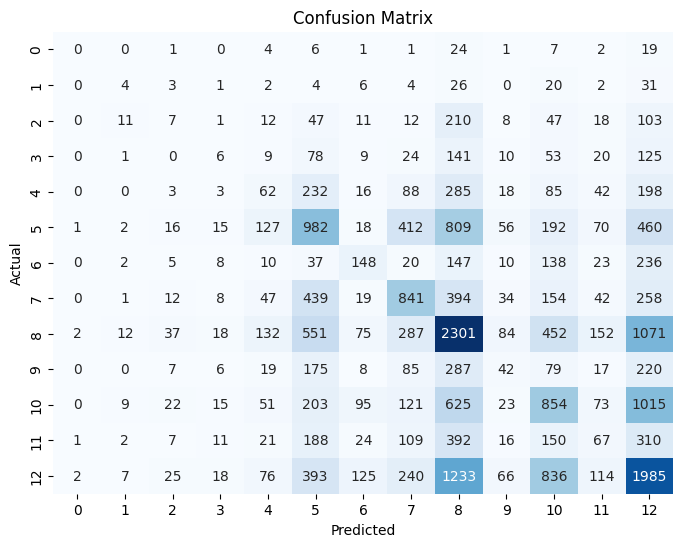

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Create a heatmap for the confusion matrix with color-coding based on accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()